In [1267]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install -U seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re


In [1269]:
df = pd.read_csv("laptops_train.csv")

Датасет характеристик и цен ноутбуков.

Описание датасета:\
**Manufacturer** ––– название компании-производителя ноутбука.\
**Model Name** ––– название модели.\
**Category** ––– категория(класс) ноутбука.\
**Screen Size** ––– разрешение экрана.\
**Screen** ––– характеристики экрана.\
**CPU** ––– характеристики процессора.\
**RAM** ––– объем видеопамяти.\
**Storage** ––– характеристики накопителя.\
**GPU** ––– характеристики видеочипа.\
**Operating System** ––– операционная система.\
**Operating System Version** ––– версия операционной системы.\
**Weight** ––– вес ноутбука.\
**Price** ––– цена ноутбука.

Необходимо решить задачу регрессии и научиться предсказывать целевой признак **Price** по его нецелевым признакам. Также можно разделить цену на диапазоны и решать задачу классификации.

In [1270]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


Сразу посмотрим распределение цен:

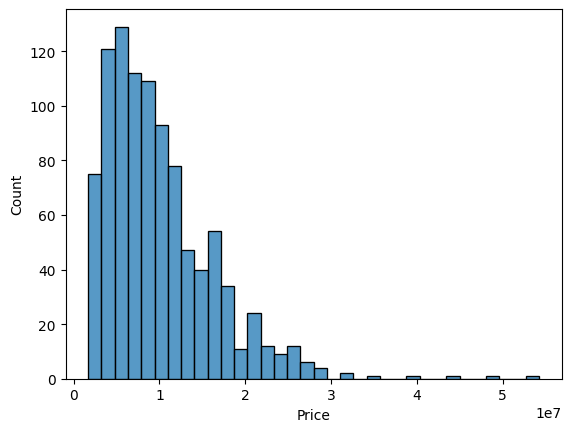

In [1271]:
sns.histplot(x="Price", data = df);

**EDA:**

In [1272]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

Признак **Operating System Version** имеет пропущенные значения. Учтем это в дальнейшем при очистке данных.

Рассмотрим признак **Category**:

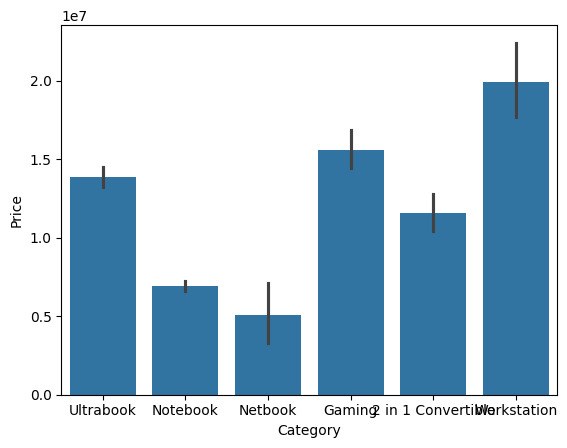

In [1273]:
sns.barplot(x = "Category", y = "Price", data = df);

Рассмотрим признак **ScreenSize**:

Преобразуем размеры экрана в числовое значение:

In [1274]:
df['Screen Size'] = df['Screen Size'].str.replace('"','')

Посмотрим, сколько уникальных значений признака **Screen**:

In [1275]:
df['Screen'].value_counts()

Screen
Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                    

Уменьшим множество значение категориального признака **Screen**:

In [1276]:
def transform(screen):
    first_number = re.search(r'\d+x', screen)
    first_number = int(first_number.group(0)[:-1])
    if first_number < 1920:
        return 'Less then Full HD'
    elif first_number < 2560:
        return 'Full HD'
    elif first_number < 3840:
        return 'Quad HD'
    else:
        return '4K'

In [1277]:
df['Screen'] = df['Screen'].apply(transform)

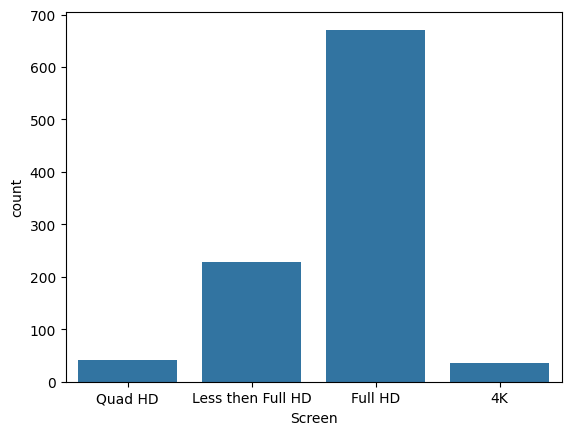

In [1278]:
sns.countplot(x="Screen", data = df);

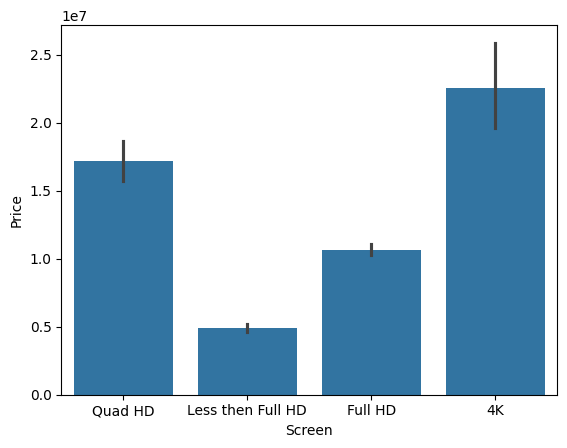

In [1279]:
sns.barplot(x = "Screen", y = "Price", data = df);

Как и предполагалось, чем больше разрешение, тем дороже ноутбук.

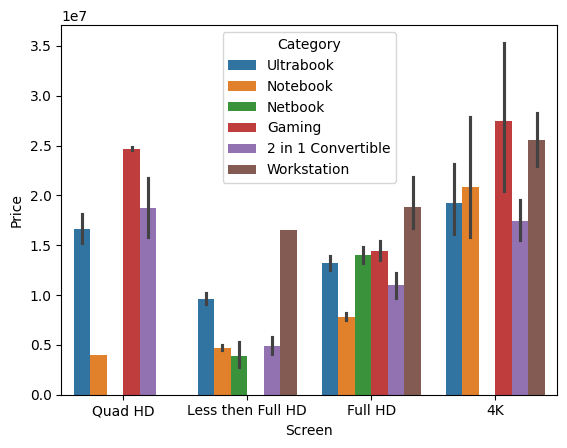

In [1280]:
sns.barplot(x='Screen', y='Price', hue='Category', data=df);

Обычные ноутбуки и ноутбуки 2 в 1 практически всегда дешевле, не зависимо от разрешения.

Рассмотрим признак **CPU**:

In [1281]:
df['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

Процессоров слишком много, есть смысл выделить частоту процессора и изменить признак с категориального на количественный.

In [1282]:
def transform(cpu):
    freq = re.search(r' \S+$', cpu)
    freq = float(freq.group(0)[1:-3])
    return freq

In [1283]:
df['CPU'] = df['CPU'].apply(transform)

In [1284]:
df['CPU'].describe()

count    977.000000
mean       2.284033
std        0.523576
min        0.900000
25%        1.800000
50%        2.500000
75%        2.700000
max        3.600000
Name: CPU, dtype: float64

Рассмотрим признак **Storage**():

In [1285]:
df['Storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid'], dtype=object)

Слишком может быть по 2 накопителя с разными типами, с этим сложно работать, выбрасываем.

In [1286]:
df.drop('Storage',axis=1,inplace=True)

In [1287]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Quad HD,2.3,8GB,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Less then Full HD,1.8,8GB,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD,2.5,8GB,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Quad HD,2.7,16GB,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Quad HD,3.1,8GB,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


Рассмотрим признак **RAM**:

In [1288]:
df['RAM'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB'],
      dtype=object)

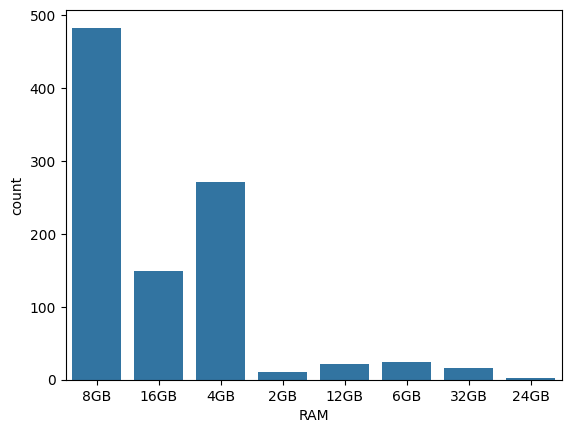

In [1289]:
sns.countplot(x="RAM", data = df);

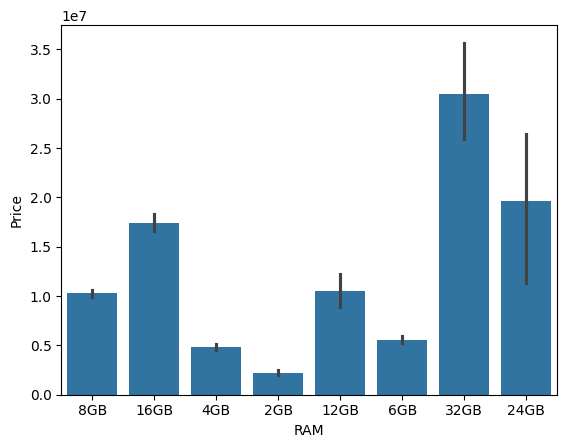

In [1290]:
sns.barplot(x = "RAM", y = "Price", data = df);

Очевидно сильная корелляция, чем больше памяти, тем больше цена.

Рассмотрим признак **GPU**:

In [1291]:
df['GPU'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [1292]:
def transform(gpu):
    if 'Intel' in gpu:
        return 'Intel'
    elif 'AMD' in gpu:
        return 'AMD'
    elif 'Nvidia' in gpu:
        return 'Nvidia'
    else:
        return 'other'

In [1293]:
df['GPU'] = df['GPU'].apply(transform)

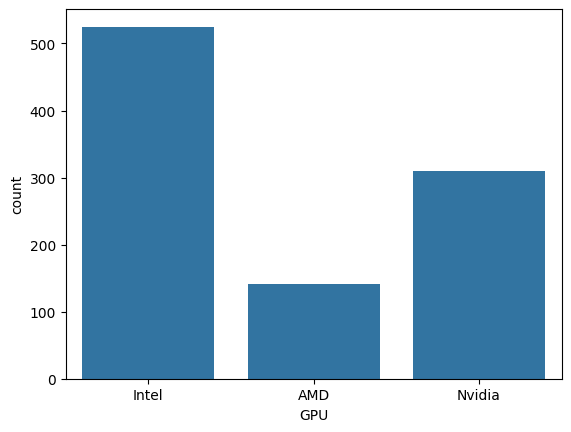

In [1294]:
sns.countplot(x="GPU", data = df);

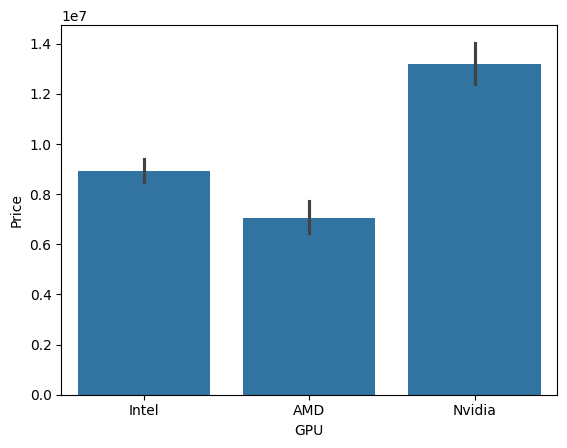

In [1295]:
sns.barplot(x = "GPU", y = "Price", data = df);

Ноутбуки с Nvidia стоят дороже, так как в остальные видечипы в основном встроенные.

Рассмотрим признаки **Operating System** и **Operating System Version**: 

In [1296]:
df['Operating System'].value_counts()

Operating System
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: count, dtype: int64

Уберем дублирующиеся значения:

In [1297]:
df['Operating System'] = df['Operating System'].str.replace('macOS','Mac OS')

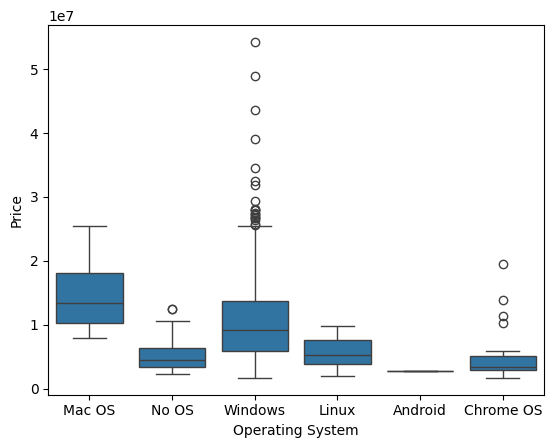

In [1298]:
sns.boxplot(x = "Operating System", y = "Price", data = df);

Ноутбуки с Mac OS в среднем дороже остальных ноутбуков, однако у ноутбуков с Windows есть представители с гораздо больше ценой.

In [1299]:
df['Operating System Version'].value_counts()

Operating System Version
10      819
7        10
10 S      8
X         4
Name: count, dtype: int64

Уберем дублирующиеся значения:

In [1300]:
df['Operating System Version'] = df['Operating System Version'].str.replace('10 S','10')

In [1301]:
df['Operating System Version'] = df['Operating System Version'].str.replace('X','10')

In [1302]:
df['Operating System Version'].value_counts()

Operating System Version
10    831
7      10
Name: count, dtype: int64

Заполним пустые значения числом 10, так как ноутбуки со значением 7 старые, а значит дешевые + их немного:

In [1303]:
df['Operating System Version'] = df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])

In [1304]:
df['Operating System Version'].isnull().sum()

0

In [1305]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,Quad HD,2.3,8GB,Intel,Mac OS,10,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,13.3,Less then Full HD,1.8,8GB,Intel,Mac OS,10,1.34kg,7993374.48
2,HP,250 G6,Notebook,15.6,Full HD,2.5,8GB,Intel,No OS,10,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,15.4,Quad HD,2.7,16GB,AMD,Mac OS,10,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,13.3,Quad HD,3.1,8GB,Intel,Mac OS,10,1.37kg,16037611.20


**Feature Engineering and Data Cleaning:**

Некоторые полезные преобразования уже были совершены ранее.

Уберем постфиксы у некоторых признаков, чтобы их можно было перевести в количественные:

In [1306]:
df['RAM'] = df['RAM'].str.split('GB').str[0]

In [1307]:
df['Weight'] = df['Weight'].str.split('kg').str[0]

Уберем признак **Model Name**(потому что у нас уже есть похожая информация: производитель и класс ноутбука):

In [1308]:
df.drop('Model Name',axis=1,inplace=True)

Преобразуем некоторые признаки:

In [1309]:
df['Screen Size'] = df['Screen Size'].astype('float')
df['RAM'] = df['RAM'].astype('int')
df['Operating System Version'] = df['Operating System Version'].astype('int')
df['Weight'] = df['Weight'].astype('float')

Создаем новый признак - **Brand Type**:

In [1310]:
df['Brand Type'] = 0

In [1311]:
df['Manufacturer'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [1312]:
for i in range(len(df['Manufacturer'])):
    brand = df['Manufacturer'][i]
    if brand in ['Apple', 'Microsoft', 'HP', 'Lenovo', 'Dell', 'Toshiba', 'Samsung']:
        df['Brand Type'][i] = 'Native'
    elif brand in ['Acer', 'Asus', 'MSI', 'Razer']:
        df['Brand Type'][i] = 'Gaming'
    elif brand in ['Huawei', 'Xiaomi', 'Chuvi', 'Vero', 'Fujitsu']:
        df['Brand Type'][i] = 'Chinese'
    else:
         df['Brand Type'][i] = 'Other'

C:\Users\UAPb\AppData\Local\Temp\ipykernel_15808\1944849801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand Type'][i] = 'Native'


In [1313]:
df['Brand Type'].unique()

array(['Native', 'Gaming', 'Other', 'Chinese'], dtype=object)

Уберем признак **Manufacturer**(после создания нового признака он нам не нужен):

In [1314]:
df.drop('Manufacturer',axis=1,inplace=True)

Трансформация строк в числа:

In [1315]:
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col} : {df[col].unique()}')

Category : [4 3 2 1 0 5]
Screen : [3 2 1 0]
GPU : [1 0 2]
Operating System : [3 4 5 2 0 1]
Brand Type : [2 1 3 0]


**Корреляция признаков**:

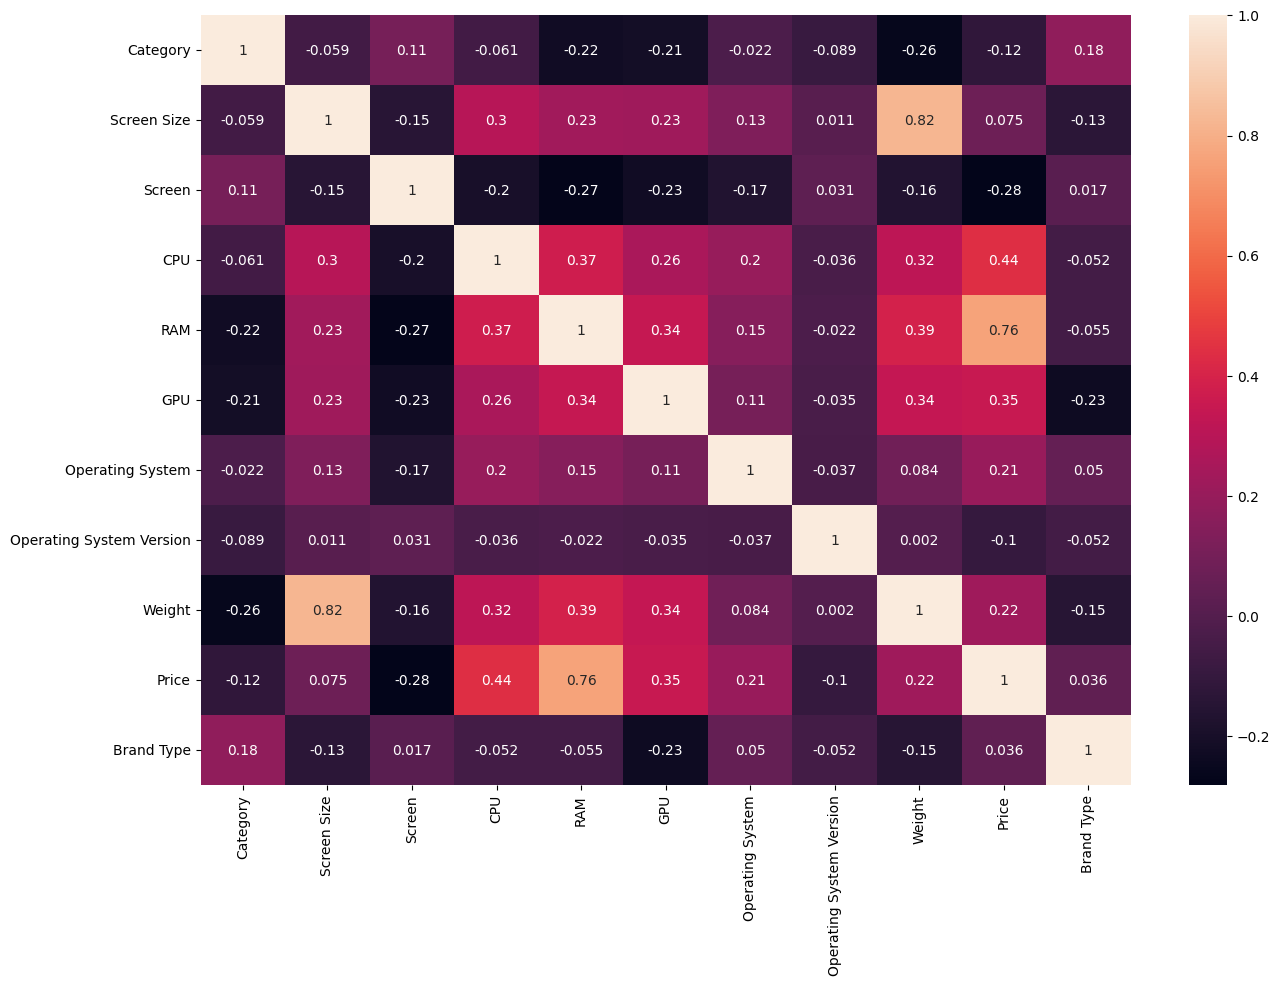

In [1316]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()

Видно, что вес очень сильно кореллирует с размером экрана - удалим его:

In [1317]:
df.drop('Weight',axis=1,inplace=True)